In [77]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [78]:
esg = pd.read_csv('Dissertation Dataset - Final.csv')
esg

,No.,Ticker,Company Name,Industry,HQ Country,2024 Rating,2023 Rating,2022 Rating,2021 Rating,Revenue 2023,...,Revenue 2022,NI 2022,Profit Margin 2022,Market Cap 2022,Revenue Growth 2022,Revenue 2021,NI 2021,Profit Margin 2021,Market Cap 2021,Revenue Growth 2021
0,1,SU.PA,Schneider Electric SE,Electrical Equipment,France,AAA,AAA,AAA,AAA,3.080000e+10,...,2.890000e+10,3300000000,0.114,8.800000e+10,0.182,2.450000e+10,3100000000,0.127,7.500000e+10,0.121
1,2,ASML.AS,ASML Holding NV,Semiconductors,Netherlands,AAA,AAA,AAA,AAA,2.360000e+10,...,1.860000e+10,5600000000,0.301,2.150000e+11,0.136,1.640000e+10,4900000000,0.299,2.450000e+11,0.332
2,3,ACN,Accenture plc,IT Services,Ireland,AAA,AAA,AAA,AAA,5.120000e+10,...,5.030000e+10,5800000000,0.115,1.650000e+11,0.221,4.120000e+10,5200000000,0.126,1.750000e+11,0.142
3,4,ECL,Ecolab Inc.,Chemicals,USA,AAA,AAA,AAA,AAA,1.220000e+10,...,1.170000e+10,1080000000,0.092,4.600000e+10,0.098,1.070000e+10,980000000,0.092,4.800000e+10,0.088
4,5,ADBE,Adobe Inc.,Software,USA,AAA,AAA,AAA,AAA,1.550000e+10,...,1.460000e+10,3980000000,0.273,1.350000e+11,0.115,1.310000e+10,4260000000,0.325,2.250000e+11,0.229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,PEG,Public Service Enterprise Group,Electric Utilities,USA,BB,BB,BB,BB,1.056000e+10,...,1.020000e+10,1800000000,0.176,2.900000e+10,0.140,9.000000e+09,1800000000,0.200,2.800000e+10,0.100
96,97,XEL,Xcel Energy Inc.,Electric Utilities,USA,BB,BB,BB,BB,1.352000e+10,...,1.310000e+10,1600000000,0.122,3.000000e+10,0.110,1.180000e+10,1400000000,0.119,2.900000e+10,0.070
97,98,EVRG,Evergy Inc.,Electric Utilities,USA,BB,BB,BB,BB,9.900000e+09,...,9.700000e+09,700000000,0.072,1.200000e+10,0.070,9.100000e+09,700000000,0.077,1.300000e+10,0.050
98,99,NRG,NRG Energy Inc.,Independent Power Producers,USA,B,B,B,B,2.800000e+10,...,1.840000e+10,1200000000,0.065,1.100000e+10,0.280,1.440000e+10,-400000000,-2.780,1.000000e+10,0.330


In [79]:
esg.shape

(100, 29)

In [80]:
esg.head(5)

,No.,Ticker,Company Name,Industry,HQ Country,2024 Rating,2023 Rating,2022 Rating,2021 Rating,Revenue 2023,...,Revenue 2022,NI 2022,Profit Margin 2022,Market Cap 2022,Revenue Growth 2022,Revenue 2021,NI 2021,Profit Margin 2021,Market Cap 2021,Revenue Growth 2021
0,1,SU.PA,Schneider Electric SE,Electrical Equipment,France,AAA,AAA,AAA,AAA,3.080000e+10,...,2.890000e+10,3300000000,0.114,8.800000e+10,0.182,2.450000e+10,3100000000,0.127,7.500000e+10,0.121
1,2,ASML.AS,ASML Holding NV,Semiconductors,Netherlands,AAA,AAA,AAA,AAA,2.360000e+10,...,1.860000e+10,5600000000,0.301,2.150000e+11,0.136,1.640000e+10,4900000000,0.299,2.450000e+11,0.332
2,3,ACN,Accenture plc,IT Services,Ireland,AAA,AAA,AAA,AAA,5.120000e+10,...,5.030000e+10,5800000000,0.115,1.650000e+11,0.221,4.120000e+10,5200000000,0.126,1.750000e+11,0.142
3,4,ECL,Ecolab Inc.,Chemicals,USA,AAA,AAA,AAA,AAA,1.220000e+10,...,1.170000e+10,1080000000,0.092,4.600000e+10,0.098,1.070000e+10,980000000,0.092,4.800000e+10,0.088
4,5,ADBE,Adobe Inc.,Software,USA,AAA,AAA,AAA,AAA,1.550000e+10,...,1.460000e+10,3980000000,0.273,1.350000e+11,0.115,1.310000e+10,4260000000,0.325,2.250000e+11,0.229


In [81]:
esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No.                  100 non-null    int64  
 1   Ticker               100 non-null    object 
 2   Company Name         100 non-null    object 
 3   Industry             100 non-null    object 
 4   HQ Country           100 non-null    object 
 5   2024 Rating          100 non-null    object 
 6   2023 Rating          100 non-null    object 
 7   2022 Rating          100 non-null    object 
 8   2021 Rating          100 non-null    object 
 9   Revenue 2023         100 non-null    float64
 10  NI 2023              100 non-null    int64  
 11  Profit Margin 2023   100 non-null    float64
 12  Market Cap 2023      100 non-null    float64
 13  Revenue Growth 2023  100 non-null    float64
 14  Revenue 2024         100 non-null    float64
 15  NI 2024              100 non-null    int6

In [82]:
#statistical summary

esg.describe()

,No.,Revenue 2023,NI 2023,Profit Margin 2023,Market Cap 2023,Revenue Growth 2023,Revenue 2024,NI 2024,Profit Margin 2024,Market Cap 2024,...,Revenue 2022,NI 2022,Profit Margin 2022,Market Cap 2022,Revenue Growth 2022,Revenue 2021,NI 2021,Profit Margin 2021,Market Cap 2021,Revenue Growth 2021
count,100.000000,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,100.00000,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,...,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,100.000000
mean,50.500000,5.149832e+10,5.917000e+09,0.118350,1.203846e+11,0.07916,5.234692e+10,6.175600e+09,0.121530,1.221865e+11,...,5.119940e+10,4.979750e+09,0.108960,1.024920e+11,0.174000,4.310660e+10,5.080700e+09,-0.688700,1.077280e+11,0.235100
std,29.011492,7.843044e+10,1.195206e+10,0.116096,2.731229e+11,0.23217,7.861521e+10,1.230857e+10,0.113357,2.772960e+11,...,7.816589e+10,9.845676e+09,0.119709,2.083858e+11,0.188028,6.673915e+10,1.095854e+10,3.281111,2.349223e+11,0.230864
min,1.000000,2.150000e+09,-3.200000e+09,-0.360000,2.000000e+09,-0.41200,2.300000e+09,-2.500000e+09,-0.360000,2.000000e+09,...,1.710000e+09,-2.200000e+10,-0.447000,1.800000e+09,-0.430000,1.380000e+09,-3.000000e+09,-24.240000,1.600000e+09,-0.210000
25%,25.750000,1.242500e+10,1.000000e+09,0.062500,2.200000e+10,-0.02300,1.277500e+10,1.000000e+09,0.062500,2.200000e+10,...,1.167500e+10,8.375000e+08,0.059500,2.100000e+10,0.070000,1.005000e+10,7.650000e+08,0.068250,2.150000e+10,0.072000
50%,50.500000,2.417000e+10,2.225000e+09,0.107500,4.100000e+10,0.06000,2.610000e+10,2.350000e+09,0.108500,4.175000e+10,...,2.010000e+10,2.350000e+09,0.106500,4.250000e+10,0.144500,1.795000e+10,1.800000e+09,0.106000,4.000000e+10,0.142500
75%,75.250000,5.805000e+10,5.975000e+09,0.161500,1.097500e+11,0.12700,6.225000e+10,6.275000e+09,0.164000,1.117500e+11,...,5.875000e+10,5.525000e+09,0.173000,9.800000e+10,0.234250,5.170000e+10,5.200000e+09,0.186500,9.625000e+10,0.354000
max,100.000000,5.800000e+11,8.700000e+10,0.449000,2.480000e+12,1.52000,5.800000e+11,8.700000e+10,0.456000,2.520000e+12,...,5.500000e+11,5.520000e+10,0.422000,1.850000e+12,0.820000,5.140000e+11,8.500000e+10,0.970000,2.050000e+12,0.830000


In [83]:
#Identifying Missing Values

esg.isnull().sum()

No.                    0
Ticker                 0
Company Name           0
Industry               0
HQ Country             0
2024 Rating            0
2023 Rating            0
2022 Rating            0
2021 Rating            0
Revenue 2023           0
NI 2023                0
Profit Margin 2023     0
Market Cap 2023        0
Revenue Growth 2023    0
Revenue 2024           0
NI 2024                0
Profit Margin 2024     0
Market Cap 2024        0
Revenue Growth 2024    0
Revenue 2022           0
NI 2022                0
Profit Margin 2022     0
Market Cap 2022        0
Revenue Growth 2022    0
Revenue 2021           0
NI 2021                0
Profit Margin 2021     0
Market Cap 2021        0
Revenue Growth 2021    0
dtype: int64

In [84]:
# ESG rating mapping
esg_mapping = {'AAA': 7, 'AA': 6, 'A': 5, 'BB': 4, 'B': 3, 'CCC': 2, 'CC': 1, 'C': 1}
esg_group_mapping = {'AAA': 'High', 'AA': 'High', 'A': 'High', 'BB': 'Low', 'B': 'Low', 'CCC': 'Low', 'CC': 'Low', 'C': 'Low'}

In [85]:
# Create panel data structure
years = [2021, 2022, 2023, 2024]
panel_data = []

for idx, row in esg.iterrows():
    for year in years:
        year_data = {
            'Firm': row['Company Name'],
            'Ticker': row['Ticker'],
            'Industry': row['Industry'],
            'Country': row['HQ Country'],
            'Year': year,
            'ESG_Rating': row[f'{year} Rating'],
            'Revenue': row[f'Revenue {year}'],
            'Net_Income': row[f'NI {year}'],
            'Profit_Margin': row[f'Profit Margin {year}'],
            'Market_Cap': row[f'Market Cap {year}']
        }
        
        if f'Revenue Growth {year}' in esg.columns:
            year_data['Revenue_Growth'] = row[f'Revenue Growth {year}']
        
        panel_data.append(year_data)

df = pd.DataFrame(panel_data)

In [86]:
df

,Firm,Ticker,Industry,Country,Year,ESG_Rating,Revenue,Net_Income,Profit_Margin,Market_Cap,Revenue_Growth
0,Schneider Electric SE,SU.PA,Electrical Equipment,France,2021,AAA,2.450000e+10,3100000000,0.127,7.500000e+10,0.121
1,Schneider Electric SE,SU.PA,Electrical Equipment,France,2022,AAA,2.890000e+10,3300000000,0.114,8.800000e+10,0.182
2,Schneider Electric SE,SU.PA,Electrical Equipment,France,2023,AAA,3.080000e+10,3420000000,0.111,1.026000e+11,0.050
3,Schneider Electric SE,SU.PA,Electrical Equipment,France,2024,AAA,3.250000e+10,3800000000,0.117,1.050000e+11,0.055
4,ASML Holding NV,ASML.AS,Semiconductors,Netherlands,2021,AAA,1.640000e+10,4900000000,0.299,2.450000e+11,0.332
...,...,...,...,...,...,...,...,...,...,...,...
395,NRG Energy Inc.,NRG,Independent Power Producers,USA,2024,B,2.800000e+10,-100000000,-0.360,1.400000e+10,0.520
396,China Construction Bank Corp.,0939.HK,Banks,China,2021,BB,9.300000e+10,39000000000,0.419,1.600000e+11,0.080
397,China Construction Bank Corp.,0939.HK,Banks,China,2022,BB,1.020000e+11,43000000000,0.422,1.600000e+11,0.000
398,China Construction Bank Corp.,0939.HK,Banks,China,2023,BB,9.900000e+10,41000000000,0.414,1.600000e+11,0.000


In [87]:
# Convert ESG to numeric and create groups
df['ESG_Score'] = df['ESG_Rating'].map(esg_mapping)
df['ESG_Group'] = df['ESG_Rating'].map(esg_group_mapping)

In [88]:
# Remove mid ESG group for binary classification
df = df[df['ESG_Group'].isin(['High', 'Low'])]
df

,Firm,Ticker,Industry,Country,Year,ESG_Rating,Revenue,Net_Income,Profit_Margin,Market_Cap,Revenue_Growth,ESG_Score,ESG_Group
0,Schneider Electric SE,SU.PA,Electrical Equipment,France,2021,AAA,2.450000e+10,3100000000,0.127,7.500000e+10,0.121,7,High
1,Schneider Electric SE,SU.PA,Electrical Equipment,France,2022,AAA,2.890000e+10,3300000000,0.114,8.800000e+10,0.182,7,High
2,Schneider Electric SE,SU.PA,Electrical Equipment,France,2023,AAA,3.080000e+10,3420000000,0.111,1.026000e+11,0.050,7,High
3,Schneider Electric SE,SU.PA,Electrical Equipment,France,2024,AAA,3.250000e+10,3800000000,0.117,1.050000e+11,0.055,7,High
4,ASML Holding NV,ASML.AS,Semiconductors,Netherlands,2021,AAA,1.640000e+10,4900000000,0.299,2.450000e+11,0.332,7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NRG Energy Inc.,NRG,Independent Power Producers,USA,2024,B,2.800000e+10,-100000000,-0.360,1.400000e+10,0.520,3,Low
396,China Construction Bank Corp.,0939.HK,Banks,China,2021,BB,9.300000e+10,39000000000,0.419,1.600000e+11,0.080,4,Low
397,China Construction Bank Corp.,0939.HK,Banks,China,2022,BB,1.020000e+11,43000000000,0.422,1.600000e+11,0.000,4,Low
398,China Construction Bank Corp.,0939.HK,Banks,China,2023,BB,9.900000e+10,41000000000,0.414,1.600000e+11,0.000,4,Low


In [171]:
esg_1=pd.crosstab(df.Year,df.ESG_Group)
esg_1


ESG_Group,High,Low
Year,,
2021,49,51
2022,50,50
2023,50,50
2024,50,50


Text(0, 0.5, 'No. of Firms')

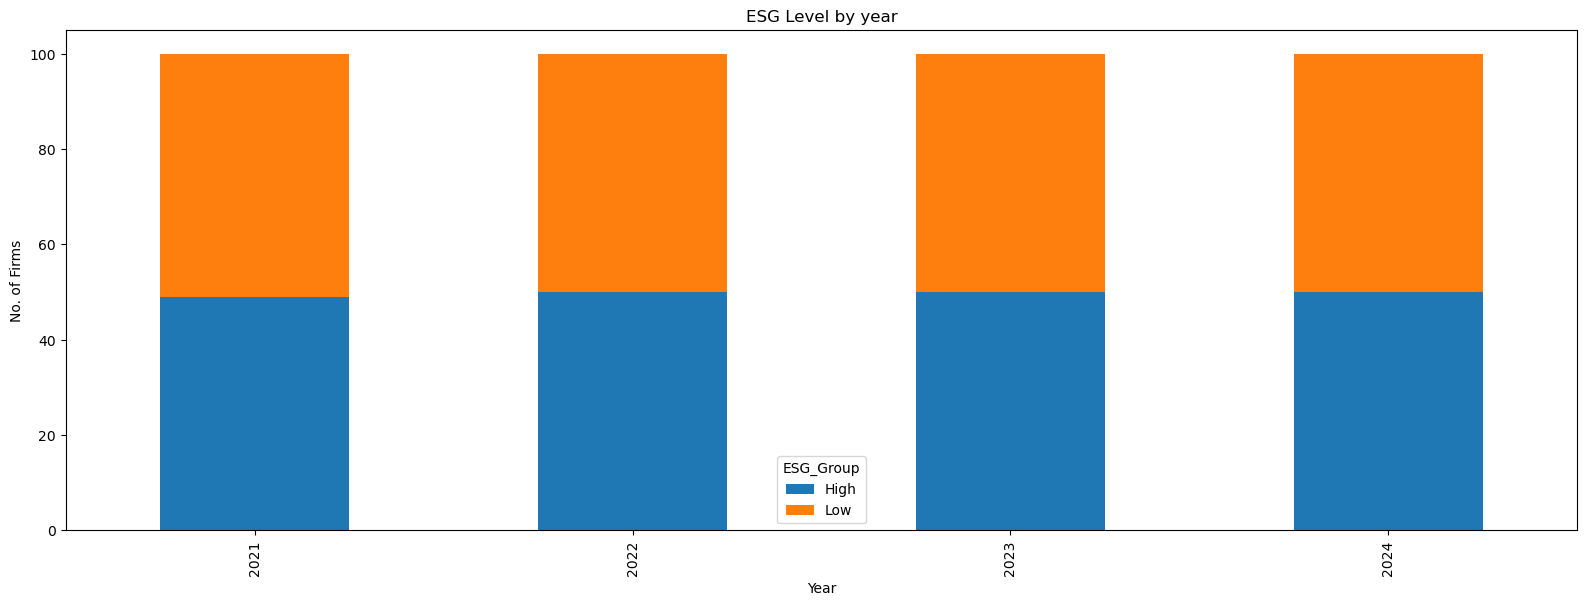

In [90]:
import matplotlib.pyplot as plt
esg_1.plot(kind='bar', stacked=True,figsize=(19.5,6.5))
plt.title("ESG Level by year")
plt.xlabel("Year")
plt.ylabel("No. of Firms")

In [91]:
esg_2=pd.crosstab(df.Industry,df.ESG_Group)
esg_2


ESG_Group,High,Low
Industry,,
Air Freight & Logistics,4,0
Airlines,0,16
Apparel,4,0
Automobiles,8,0
Banks,0,4
Biotechnology,4,0
Capital Markets,4,0
Chemicals,7,1
Communications Equipment,4,0


Text(0, 0.5, 'No. of Firms')

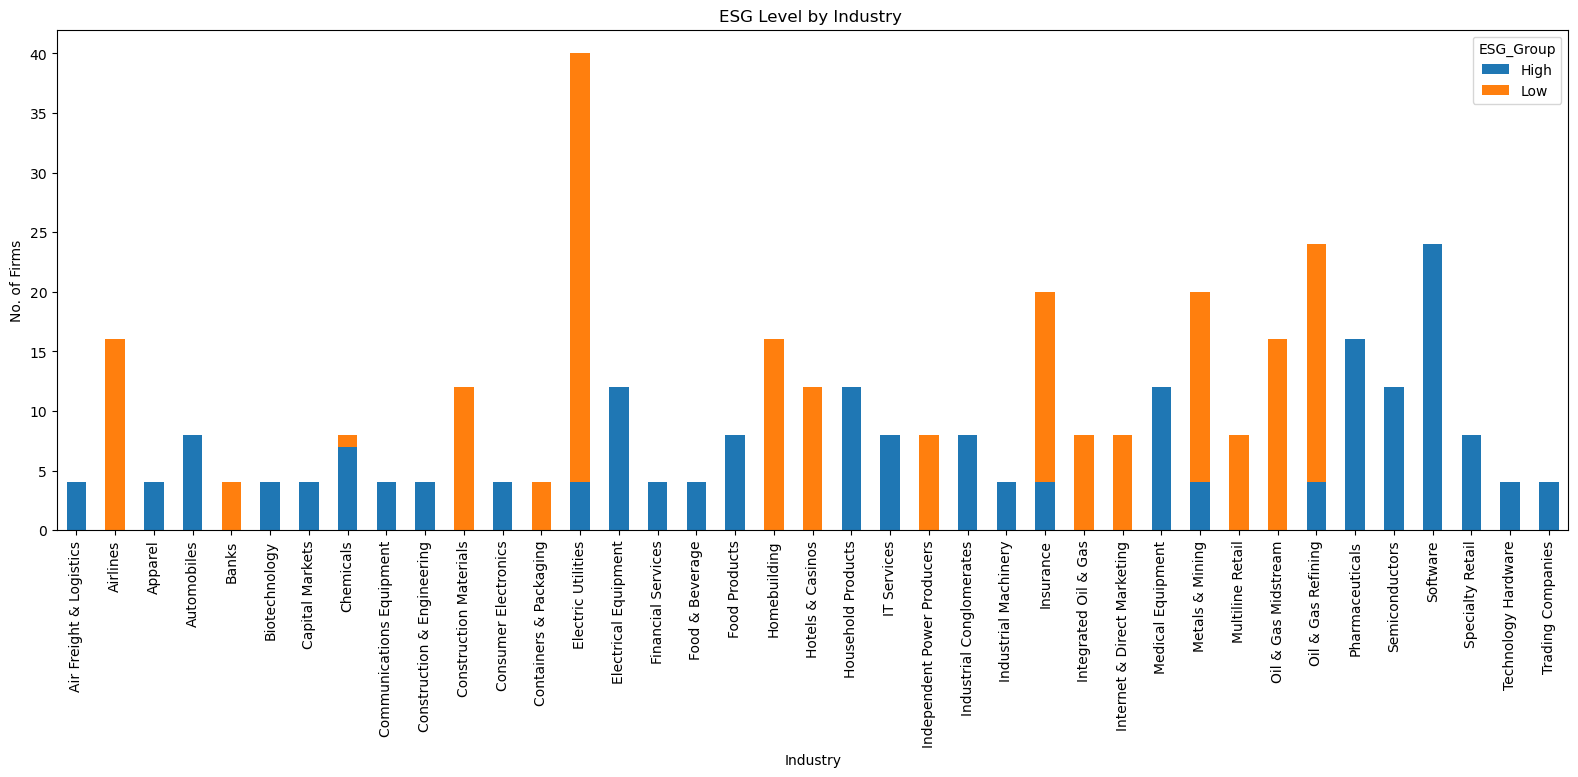

In [92]:
import matplotlib.pyplot as plt
esg_2.plot(kind='bar', stacked=True,figsize=(19.5,6.5))
plt.title("ESG Level by Industry ")
plt.xlabel("Industry")
plt.ylabel("No. of Firms")

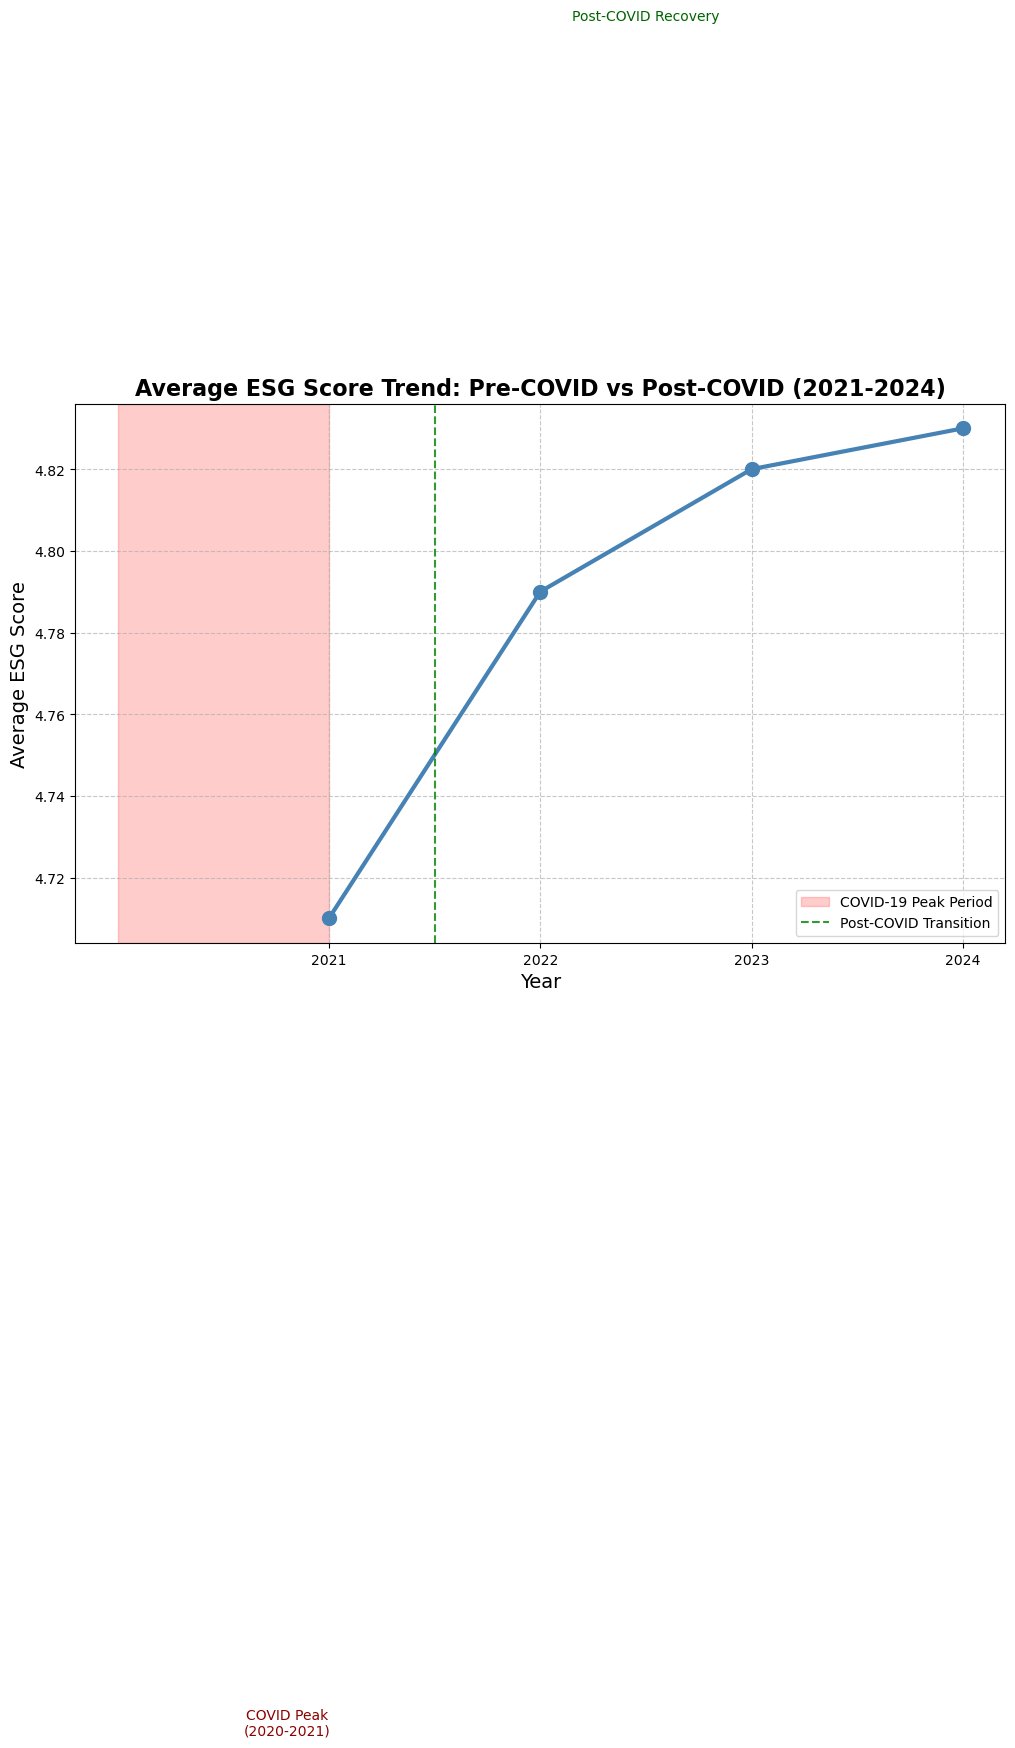

Average ESG Scores by Year:
      ESG_Score
Year           
2021       4.71
2022       4.79
2023       4.82
2024       4.83


In [93]:
# Calculate average ESG score by year
avg_esg_by_year = df.groupby('Year')['ESG_Score'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 7))
plt.plot(avg_esg_by_year['Year'], avg_esg_by_year['ESG_Score'], marker='o', linestyle='-', 
         linewidth=3, markersize=10, color='steelblue')

# Add COVID timeline annotations
plt.axvspan(2020, 2021, alpha=0.2, color='red', label='COVID-19 Peak Period')
plt.axvline(x=2021.5, color='green', linestyle='--', alpha=0.8, label='Post-COVID Transition')

# Add text annotations
plt.text(2020.8, avg_esg_by_year['ESG_Score'].min()-0.2, 'COVID Peak\n(2020-2021)', 
         ha='center', fontsize=10, color='darkred')
plt.text(2022.5, avg_esg_by_year['ESG_Score'].max()+0.1, 'Post-COVID Recovery', 
         ha='center', fontsize=10, color='darkgreen')

plt.title('Average ESG Score Trend: Pre-COVID vs Post-COVID (2021-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average ESG Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(avg_esg_by_year['Year'])
plt.legend()
plt.tight_layout()
plt.show()

# Display the actual values
print("Average ESG Scores by Year:")
print(avg_esg_by_year.set_index('Year'))

In [94]:
# Calculate correlation between ESG score and profit margin
correlation = df['ESG_Score'].corr(df['Profit_Margin'])
correlation

0.15607604843766665

In [95]:
# Calculate average profit margin by ESG group
avg_profit_by_group = df.groupby('ESG_Group')['Profit_Margin'].mean()
avg_profit_by_group


ESG_Group
High    0.136995
Low    -0.304716
Name: Profit_Margin, dtype: float64

In [96]:
# Calculate average profit margin by ESG score
avg_profit_by_score = df.groupby('ESG_Score')['Profit_Margin'].mean()
avg_profit_by_score

ESG_Score
2    0.102000
3   -0.547177
4    0.140304
5    0.102600
6    0.125283
7    0.168929
Name: Profit_Margin, dtype: float64

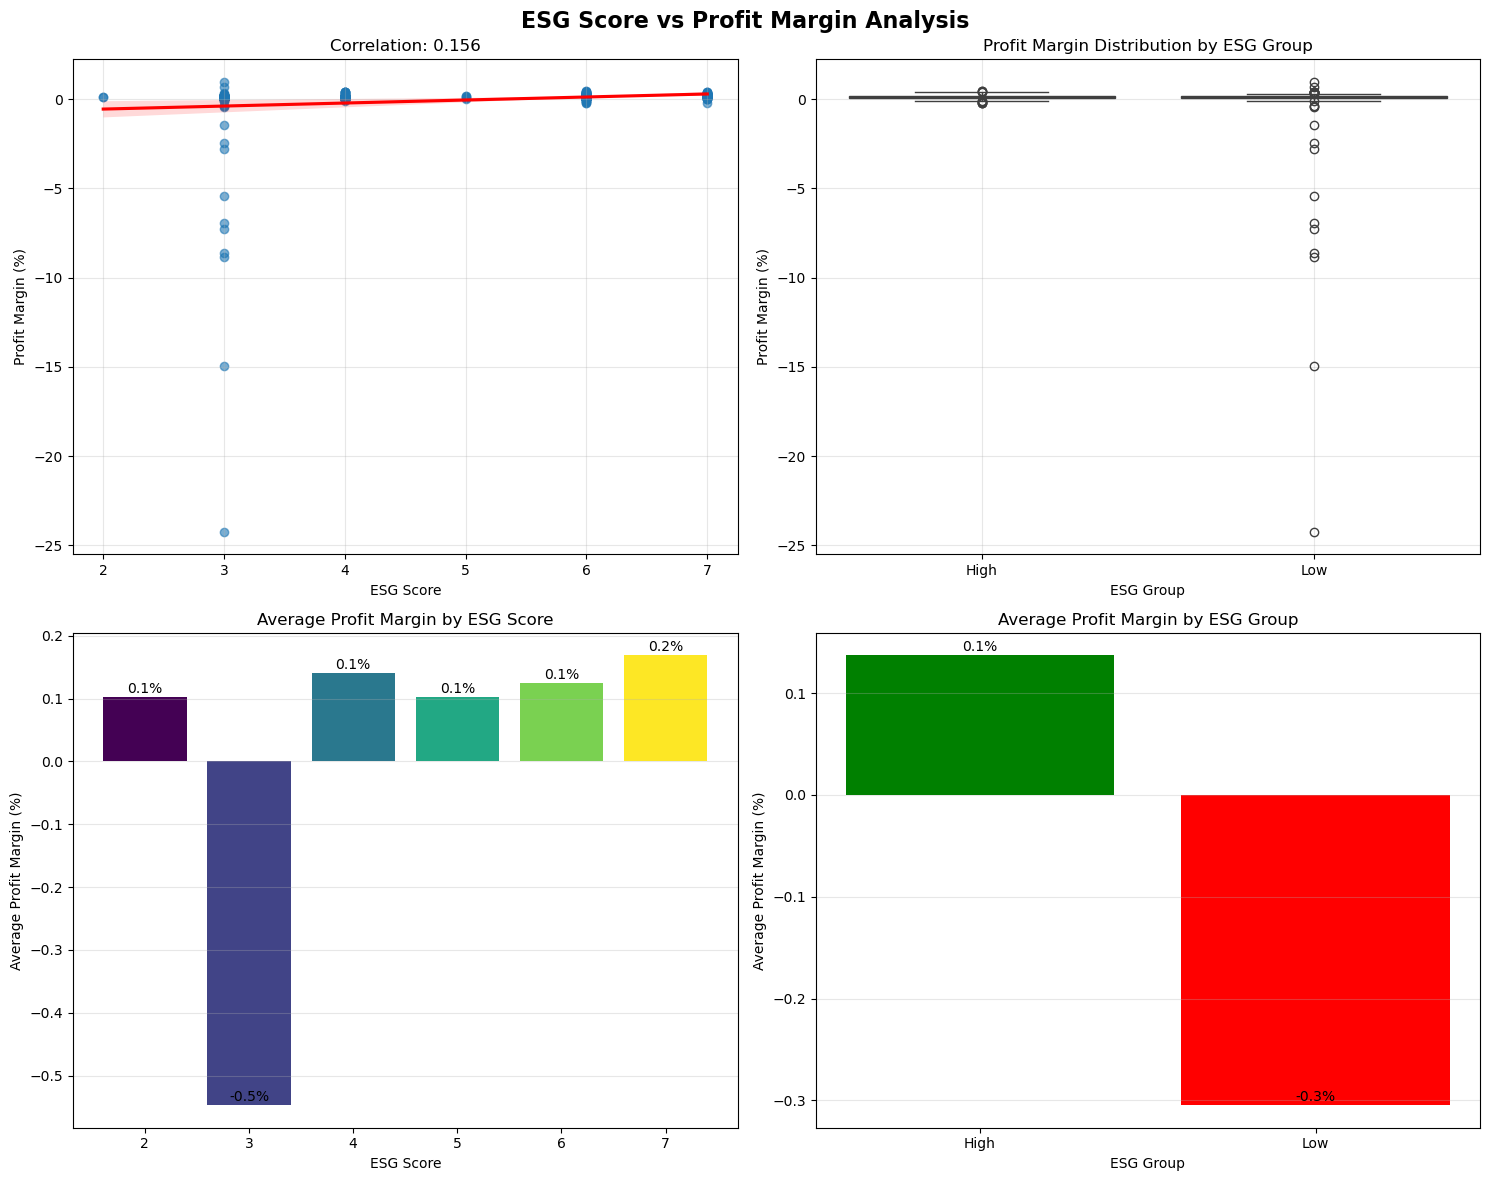

In [97]:
# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('ESG Score vs Profit Margin Analysis', fontsize=16, fontweight='bold')

# 1. Scatter plot with regression line
sns.regplot(x='ESG_Score', y='Profit_Margin', data=df, ax=ax1, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
ax1.set_title(f'Correlation: {correlation:.3f}')
ax1.set_xlabel('ESG Score')
ax1.set_ylabel('Profit Margin (%)')
ax1.grid(True, alpha=0.3)

# 2. Box plot by ESG Group
sns.boxplot(x='ESG_Group', y='Profit_Margin', data=df, ax=ax2)
ax2.set_title('Profit Margin Distribution by ESG Group')
ax2.set_xlabel('ESG Group')
ax2.set_ylabel('Profit Margin (%)')
ax2.grid(True, alpha=0.3)

# 3. Bar plot of average profit margin by ESG score
esg_scores = sorted(df['ESG_Score'].unique())
avg_profits = [avg_profit_by_score[score] for score in esg_scores]
bars = ax3.bar(esg_scores, avg_profits, color=plt.cm.viridis(np.linspace(0, 1, len(esg_scores))))
ax3.set_title('Average Profit Margin by ESG Score')
ax3.set_xlabel('ESG Score')
ax3.set_ylabel('Average Profit Margin (%)')
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, profit in zip(bars, avg_profits):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + max(avg_profits)*0.01,
             f'{profit:.1f}%', ha='center', va='bottom')

# 4. Bar plot of average profit margin by ESG group
groups = avg_profit_by_group.index
group_avgs = avg_profit_by_group.values
bars_group = ax4.bar(groups, group_avgs, color=['green', 'red'])
ax4.set_title('Average Profit Margin by ESG Group')
ax4.set_xlabel('ESG Group')
ax4.set_ylabel('Average Profit Margin (%)')
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, profit in zip(bars_group, group_avgs):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + max(group_avgs)*0.01,
             f'{profit:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('esg_profit_margin_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [98]:
# Create size control variable
df['Size'] = np.log(df['Revenue'])
df

,Firm,Ticker,Industry,Country,Year,ESG_Rating,Revenue,Net_Income,Profit_Margin,Market_Cap,Revenue_Growth,ESG_Score,ESG_Group,Size
0,Schneider Electric SE,SU.PA,Electrical Equipment,France,2021,AAA,2.450000e+10,3100000000,0.127,7.500000e+10,0.121,7,High,23.921939
1,Schneider Electric SE,SU.PA,Electrical Equipment,France,2022,AAA,2.890000e+10,3300000000,0.114,8.800000e+10,0.182,7,High,24.087107
2,Schneider Electric SE,SU.PA,Electrical Equipment,France,2023,AAA,3.080000e+10,3420000000,0.111,1.026000e+11,0.050,7,High,24.150781
3,Schneider Electric SE,SU.PA,Electrical Equipment,France,2024,AAA,3.250000e+10,3800000000,0.117,1.050000e+11,0.055,7,High,24.204506
4,ASML Holding NV,ASML.AS,Semiconductors,Netherlands,2021,AAA,1.640000e+10,4900000000,0.299,2.450000e+11,0.332,7,High,23.520547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NRG Energy Inc.,NRG,Independent Power Producers,USA,2024,B,2.800000e+10,-100000000,-0.360,1.400000e+10,0.520,3,Low,24.055470
396,China Construction Bank Corp.,0939.HK,Banks,China,2021,BB,9.300000e+10,39000000000,0.419,1.600000e+11,0.080,4,Low,25.255865
397,China Construction Bank Corp.,0939.HK,Banks,China,2022,BB,1.020000e+11,43000000000,0.422,1.600000e+11,0.000,4,Low,25.348239
398,China Construction Bank Corp.,0939.HK,Banks,China,2023,BB,9.900000e+10,41000000000,0.414,1.600000e+11,0.000,4,Low,25.318386


In [99]:
df['Industry'].value_counts()

Industry
Electric Utilities             40
Software                       24
Oil & Gas Refining             24
Metals & Mining                20
Insurance                      20
Oil & Gas Midstream            16
Homebuilding                   16
Airlines                       16
Pharmaceuticals                16
Electrical Equipment           12
Household Products             12
Semiconductors                 12
Medical Equipment              12
Hotels & Casinos               12
Construction Materials         12
Independent Power Producers     8
Specialty Retail                8
Internet & Direct Marketing     8
Multiline Retail                8
Integrated Oil & Gas            8
Automobiles                     8
IT Services                     8
Chemicals                       8
Industrial Conglomerates        8
Food Products                   8
Biotechnology                   4
Apparel                         4
Technology Hardware             4
Containers & Packaging          4
Const

In [100]:
from scipy import stats
from scipy.stats import ttest_ind, f_oneway
# Function to calculate Cohen's d effect size
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    s1, s2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

In [101]:
# Welch's t-tests for each year
years = df['Year'].unique() if 'Year' in df.columns else [2024]  # Adjust based on your data
welch_results = {}

for year in years:
    year_data = df[df['Year'] == year] if 'Year' in df.columns else df
    
    high_esg = year_data[year_data['ESG_Group'] == 'High']['Profit_Margin'].dropna()
    low_esg = year_data[year_data['ESG_Group'] == 'Low']['Profit_Margin'].dropna()
    
    # Perform Welch's t-test (unequal variances)
    t_stat, p_value = ttest_ind(high_esg, low_esg, equal_var=False)
    
    # Calculate effect size (Cohen's d)
    effect_size = cohens_d(high_esg, low_esg)
        # Calculate means and sample sizes
    mean_high = np.mean(high_esg)
    mean_low = np.mean(low_esg)
    n_high = len(high_esg)
    n_low = len(low_esg)
    
    welch_results[year] = {
        't_statistic': t_stat,
        'p_value': p_value,
        'cohens_d': effect_size,
        'mean_high': mean_high,
        'mean_low': mean_low,
        'n_high': n_high,
        'n_low': n_low,
        'significant': p_value < 0.05
    }


In [102]:
welch_results[2021]

{'t_statistic': 2.6200139985842474,
 'p_value': 0.011608528905839795,
 'cohens_d': 0.5136390781438498,
 'mean_high': 0.14751020408163265,
 'mean_low': -1.4921176470588235,
 'n_high': 49,
 'n_low': 51,
 'significant': True}

In [103]:
# One-way ANOVA

anova_results = {}

for year in years:
    year_data = df[df['Year'] == year] if 'Year' in df.columns else df
    
    # Check if we have more than 2 groups for ANOVA
    unique_groups = year_data['ESG_Group'].nunique()
    
    if unique_groups >= 2:
        # Prepare data for ANOVA
        group_data = []
        group_labels = []
        
        for group in year_data['ESG_Group'].unique():
            group_values = year_data[year_data['ESG_Group'] == group]['Profit_Margin'].dropna()
            group_data.append(group_values)
            group_labels.append(group)
        
        # Perform one-way ANOVA
        f_stat, p_value_anova = f_oneway(*group_data)
        
        # Calculate effect size (eta squared)
        # eta_squared = f_stat * (len(group_labels) - 1) / (f_stat * (len(group_labels) - 1) + (len(year_data) - len(group_labels)))
        
        anova_results[year] = {
            'f_statistic': f_stat,
            'p_value': p_value_anova,
            'n_groups': len(group_labels),
            # 'eta_squared': eta_squared,
            'significant': p_value_anova < 0.05,
            'group_means': {group: np.mean(year_data[year_data['ESG_Group'] == group]['Profit_Margin']) for group in group_labels}
        }



In [104]:
anova_results[2021]

{'f_statistic': 6.592989313885629,
 'p_value': 0.011748773271569642,
 'n_groups': 2,
 'significant': True,
 'group_means': {'High': 0.14751020408163265, 'Low': -1.4921176470588235}}

In [105]:
# Create lagged variables and control variables
df = df.sort_values(['Firm', 'Year'])
df['Log_Revenue'] = np.log(df['Revenue'] + 1)
df['Log_Market_Cap'] = np.log(df['Market_Cap'] + 1)
df['Lagged_Profit_Margin'] = df.groupby('Firm')['Profit_Margin'].shift(1)

# Drop rows with missing values
df_clean = df.dropna(subset=['Profit_Margin', 'ESG_Score', 'Log_Revenue', 'Lagged_Profit_Margin'])

# Create dummy variables for industry and year
industry_dummies = pd.get_dummies(df_clean['Industry'], prefix='Ind', drop_first=True)
year_dummies = pd.get_dummies(df_clean['Year'], prefix='Yr', drop_first=True)

# Prepare data for regression - convert only numeric columns to float
X_numeric = df_clean[['ESG_Score', 'Log_Revenue', 'Lagged_Profit_Margin']].astype(float)
X = pd.concat([X_numeric, industry_dummies.astype(float), year_dummies.astype(float)], axis=1)

X = sm.add_constant(X)
y = df_clean['Profit_Margin'].astype(float)

# Model 1: Pooled OLS (baseline)
pooled_model = sm.OLS(y, X).fit()

# Model 2: Fixed Effects model using statsmodels
# Only convert numeric columns to float, keep string columns as they are
numeric_cols = ['Profit_Margin', 'ESG_Score', 'Log_Revenue', 'Lagged_Profit_Margin']
df_clean[numeric_cols] = df_clean[numeric_cols].astype(float)

# Using statsmodels' PanelOLS equivalent with entity and time effects
fe_formula = 'Profit_Margin ~ ESG_Score + Log_Revenue + Lagged_Profit_Margin + C(Firm) + C(Year)'
fe_model = smf.ols(fe_formula, data=df_clean).fit()

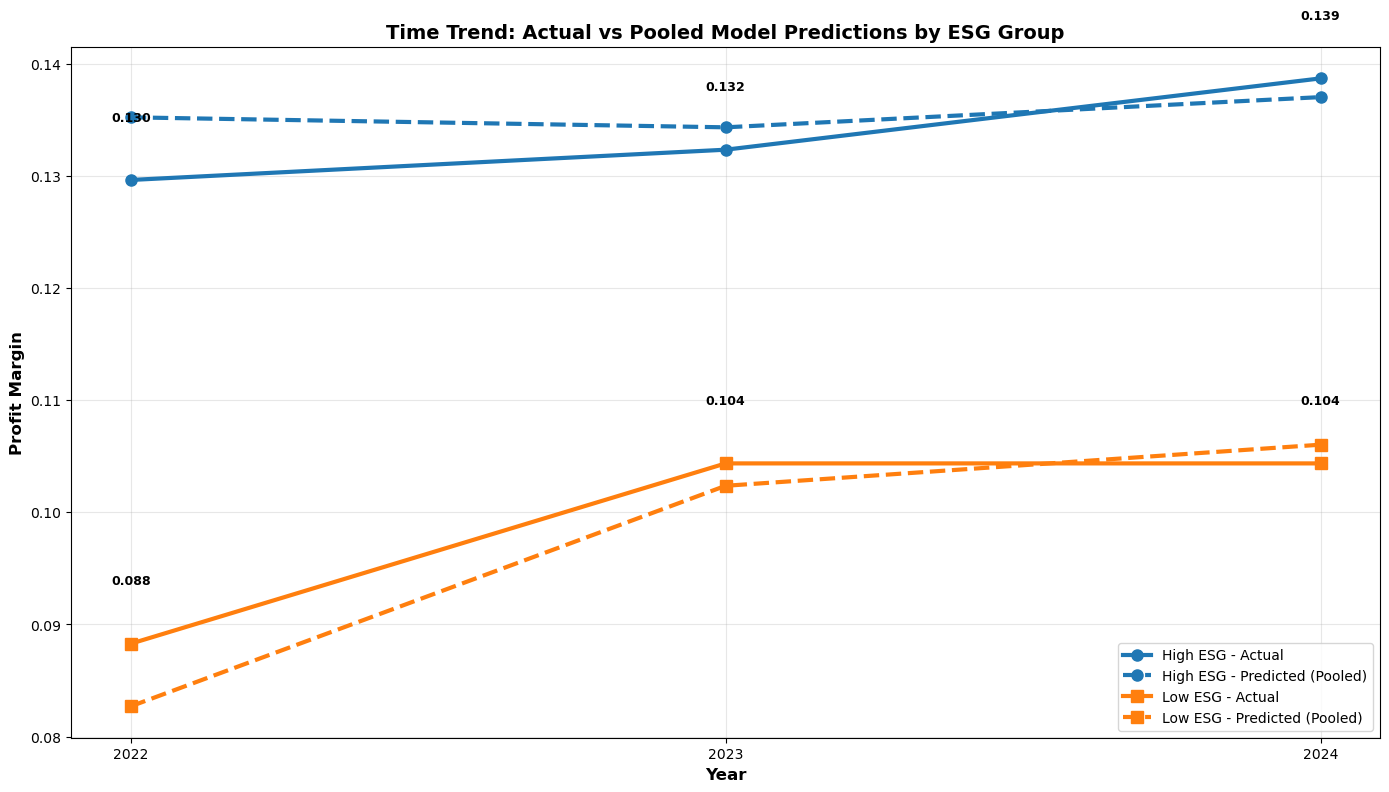

In [106]:
#Time Trend of Pooled Model Predictions vs Actual by ESG Group
plt.figure(figsize=(14, 8))

# Create ESG groups
df_clean['ESG_Group'] = np.where(df_clean['ESG_Score'] >= 5, 'High ESG', 'Low ESG')

# Get pooled model predictions
df_clean['Pooled_Predicted'] = pooled_model.predict(X)

# Calculate yearly averages for actual and predicted values
yearly_actual = df_clean.groupby(['Year', 'ESG_Group'])['Profit_Margin'].mean().unstack()
yearly_predicted = df_clean.groupby(['Year', 'ESG_Group'])['Pooled_Predicted'].mean().unstack()

# Plot trends
markers = ['o', 's']
colors = ['#1f77b4', '#ff7f0e']
line_styles = ['-', '--']

for i, esg_group in enumerate(yearly_actual.columns):
    # Actual values
    plt.plot(yearly_actual.index, yearly_actual[esg_group], 
             marker=markers[i], markersize=8, linewidth=3, 
             label=f'{esg_group} - Actual', color=colors[i], linestyle=line_styles[0])
    
    # Predicted values from pooled model
    plt.plot(yearly_predicted.index, yearly_predicted[esg_group], 
             marker=markers[i], markersize=8, linewidth=3, 
             label=f'{esg_group} - Predicted (Pooled)', color=colors[i], linestyle=line_styles[1])

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Profit Margin', fontsize=12, fontweight='bold')
plt.title('Time Trend: Actual vs Pooled Model Predictions by ESG Group', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(yearly_actual.index)

# Add value annotations for actual values
for esg_group in yearly_actual.columns:
    for year in yearly_actual.index:
        actual_value = yearly_actual.loc[year, esg_group]
        plt.text(year, actual_value + 0.005, f'{actual_value:.3f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

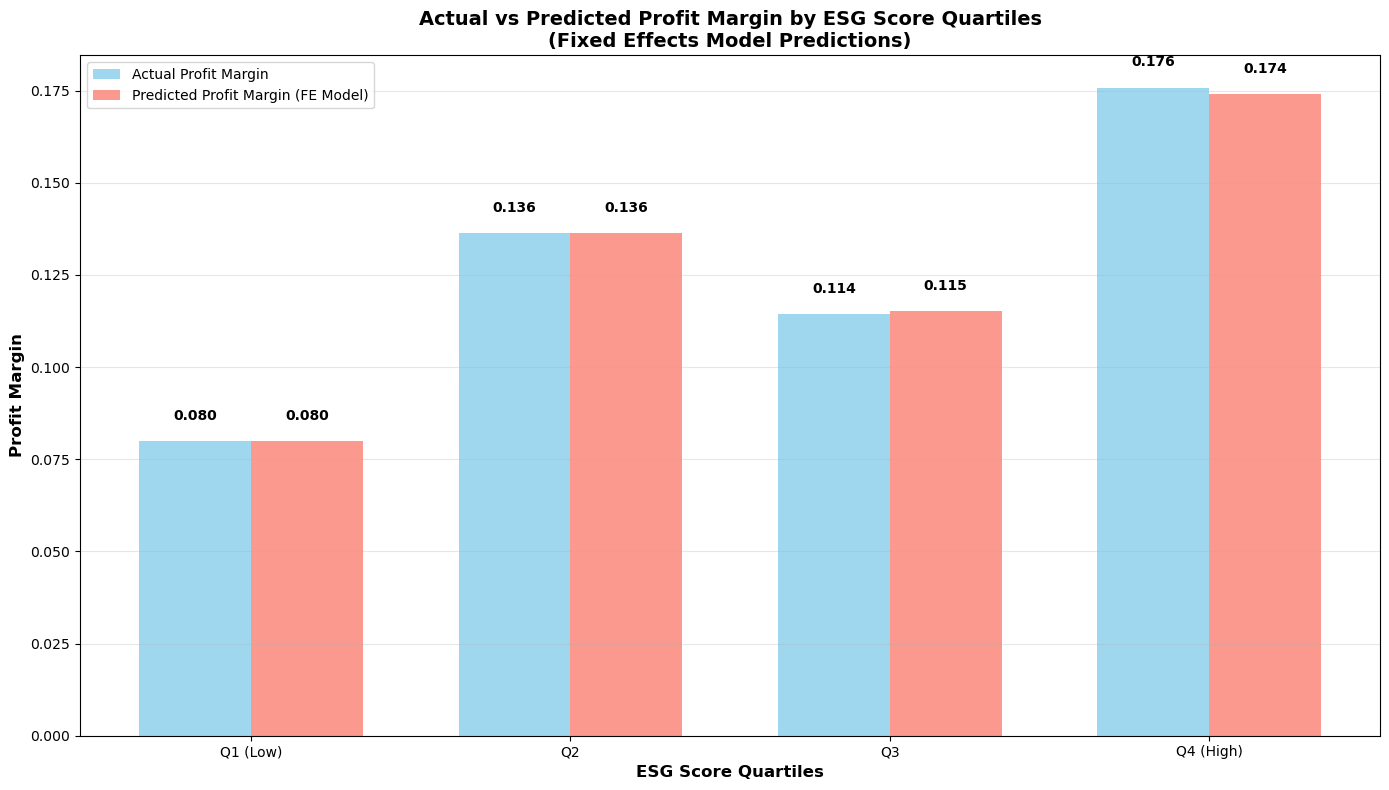

In [107]:
#Predicted vs Actual Profit Margin by ESG Score Quartiles
plt.figure(figsize=(14, 8))

# Create ESG score quartiles
df_clean['ESG_Quartile'] = pd.qcut(df_clean['ESG_Score'], 4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])

# Get predictions from fixed effects model
df_clean['Predicted_Profit'] = fe_model.predict(df_clean)

# Calculate average actual and predicted values by ESG quartile
quartile_means = df_clean.groupby('ESG_Quartile')[['Profit_Margin', 'Predicted_Profit']].mean()

x_pos = np.arange(len(quartile_means))
width = 0.35

plt.bar(x_pos - width/2, quartile_means['Profit_Margin'], width, 
        label='Actual Profit Margin', alpha=0.8, color='skyblue')
plt.bar(x_pos + width/2, quartile_means['Predicted_Profit'], width, 
        label='Predicted Profit Margin (FE Model)', alpha=0.8, color='salmon')

# Add value labels
for i, (actual, predicted) in enumerate(zip(quartile_means['Profit_Margin'], quartile_means['Predicted_Profit'])):
    plt.text(i - width/2, actual + 0.005, f'{actual:.3f}', ha='center', va='bottom', fontweight='bold')
    plt.text(i + width/2, predicted + 0.005, f'{predicted:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xlabel('ESG Score Quartiles', fontsize=12, fontweight='bold')
plt.ylabel('Profit Margin', fontsize=12, fontweight='bold')
plt.title('Actual vs Predicted Profit Margin by ESG Score Quartiles\n(Fixed Effects Model Predictions)', 
          fontsize=14, fontweight='bold')
plt.xticks(x_pos, quartile_means.index)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

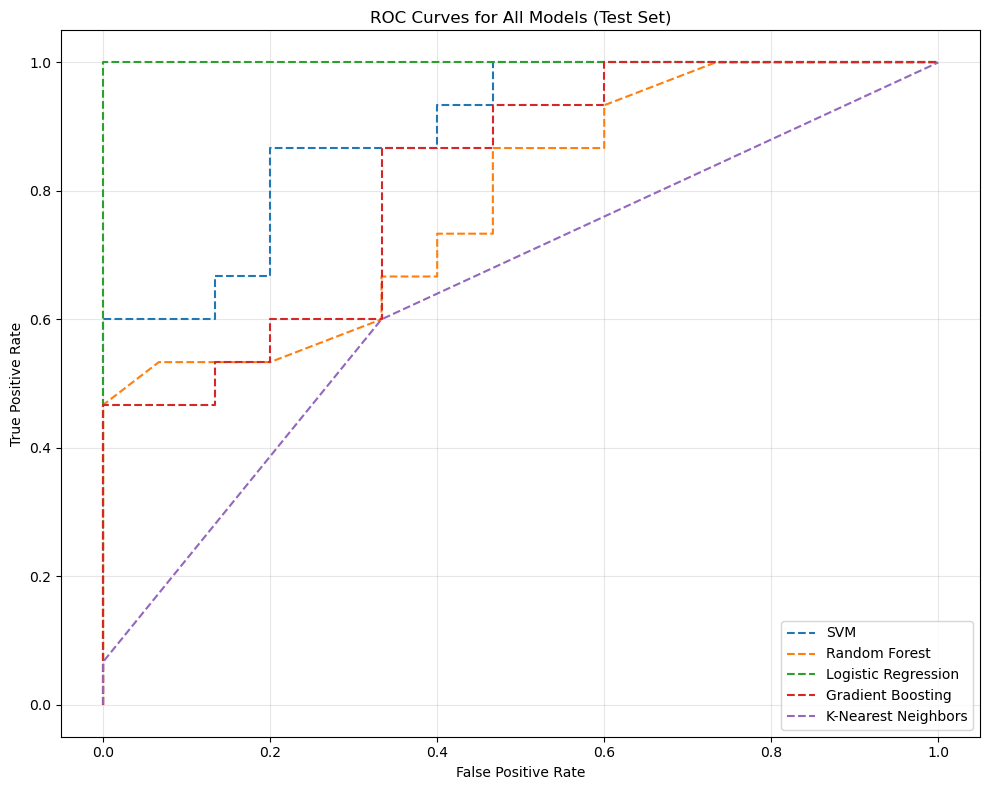

In [108]:
# Machine Learning Classification - 5 MODELS
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

# Prepare ML data
ml_df = df[df['Year'] == 2024].dropna(subset=['Profit_Margin', 'Revenue', 'Market_Cap', 'ESG_Group'])
ml_df = ml_df[ml_df['ESG_Group'].isin(['High', 'Low'])]

X = ml_df[['Profit_Margin', 'Revenue', 'Market_Cap']]
X = pd.get_dummies(ml_df[['Profit_Margin', 'Revenue', 'Market_Cap', 'Industry']], columns=['Industry'])
y = ml_df['ESG_Group'].map({'High': 1, 'Low': 0})

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models separately
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_model = SVC(probability=True, random_state=42)
knn_model = KNeighborsClassifier()

# Train and evaluate each model separately with detailed metrics
models = {
    'Logistic Regression': logistic_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model,
    'SVM': svm_model,
    'K-Nearest Neighbors': knn_model
}

results = {}
for name, model in models.items():
    # Cross-validation on training data only
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    
    # Train the model on training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on test data
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test_scaled)
    
    # Calculate metrics on test data
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    
    # Store results
    results[name] = {
        'model': model,
        'cv_auc_mean': cv_scores.mean(),
        'cv_auc_std': cv_scores.std(),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'y_pred': y_pred,
        'y_proba': y_proba,
        'fpr': fpr,
        'tpr': tpr,
        'precision_curve': precision,
        'recall_curve': recall,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# ADDITIONAL ROC CURVE PLOT
from matplotlib import pyplot
from sklearn import metrics

# Calculate roc curves for each model using test data
sv_fpr, sv_tpr, _ = metrics.roc_curve(y_test, results['SVM']['y_proba'])
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_test, results['Random Forest']['y_proba'])
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, results['Logistic Regression']['y_proba'])
gb_fpr, gb_tpr, _ = metrics.roc_curve(y_test, results['Gradient Boosting']['y_proba'])
kn_fpr, kn_tpr, _ = metrics.roc_curve(y_test, results['K-Nearest Neighbors']['y_proba'])

# Plot the roc curve for the models
plt.figure(figsize=(10, 8))
plt.plot(sv_fpr, sv_tpr, linestyle='--', label='SVM')
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest')
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression')
plt.plot(gb_fpr, gb_tpr, linestyle='--', label='Gradient Boosting')
plt.plot(kn_fpr, kn_tpr, linestyle='--', label='K-Nearest Neighbors')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models (Test Set)')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

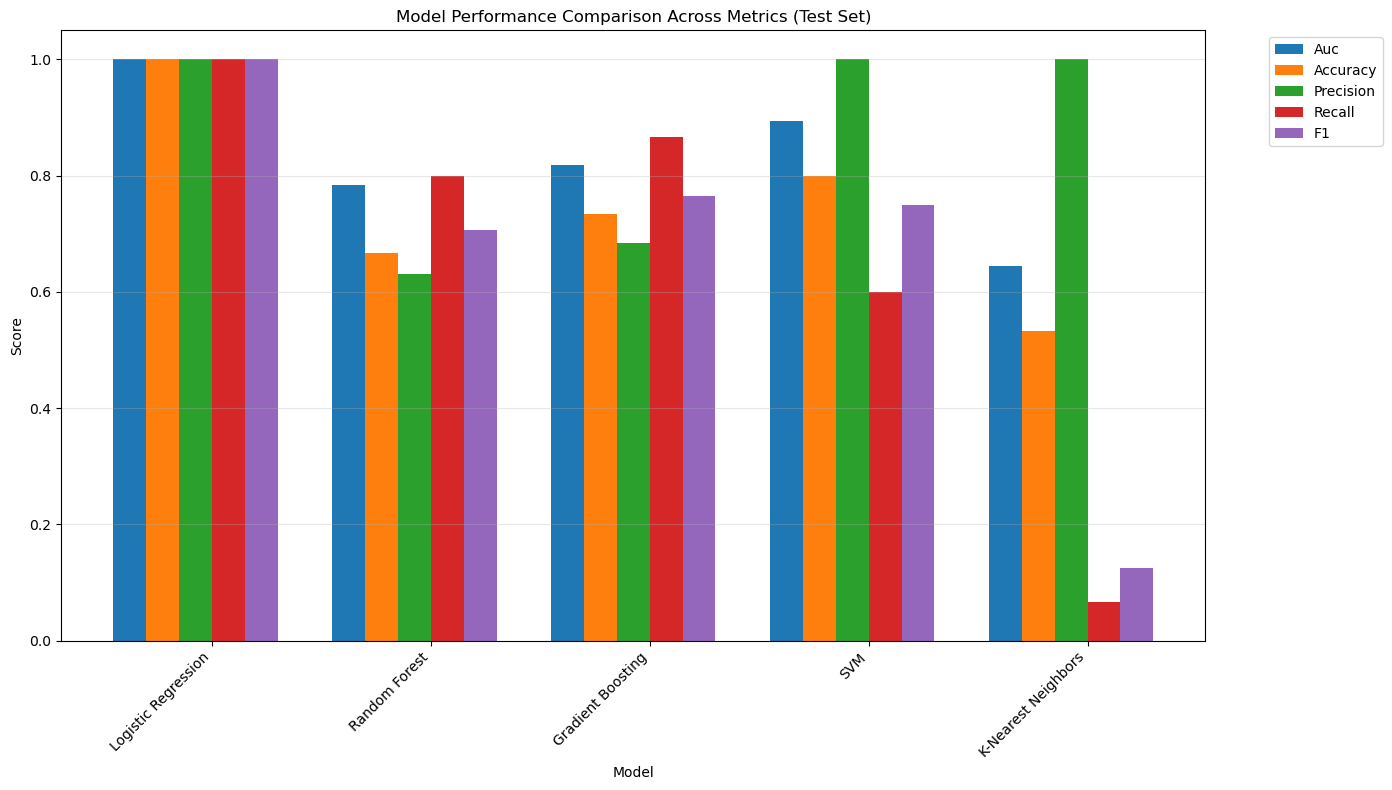

In [109]:
# 2. Model Performance Comparison
performance_metrics = ['accuracy', 'precision', 'recall', 'f1']
performance_data = {metric: [result[metric] for result in results.values()] 
                   for metric in performance_metrics}

# Add AUC scores separately
performance_data['AUC'] = [roc_auc_score(y_test, result['y_proba']) for result in results.values()]

plt.figure(figsize=(14, 8))
x_pos = np.arange(len(models))
width = 0.15

metrics_to_plot = ['AUC'] + performance_metrics
for i, metric in enumerate(metrics_to_plot):
    offset = width * (i - len(metrics_to_plot)/2)
    plt.bar(x_pos + offset, performance_data[metric], width, label=metric.replace('_', ' ').title())

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison Across Metrics (Test Set)')
plt.xticks(x_pos, list(models.keys()), rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


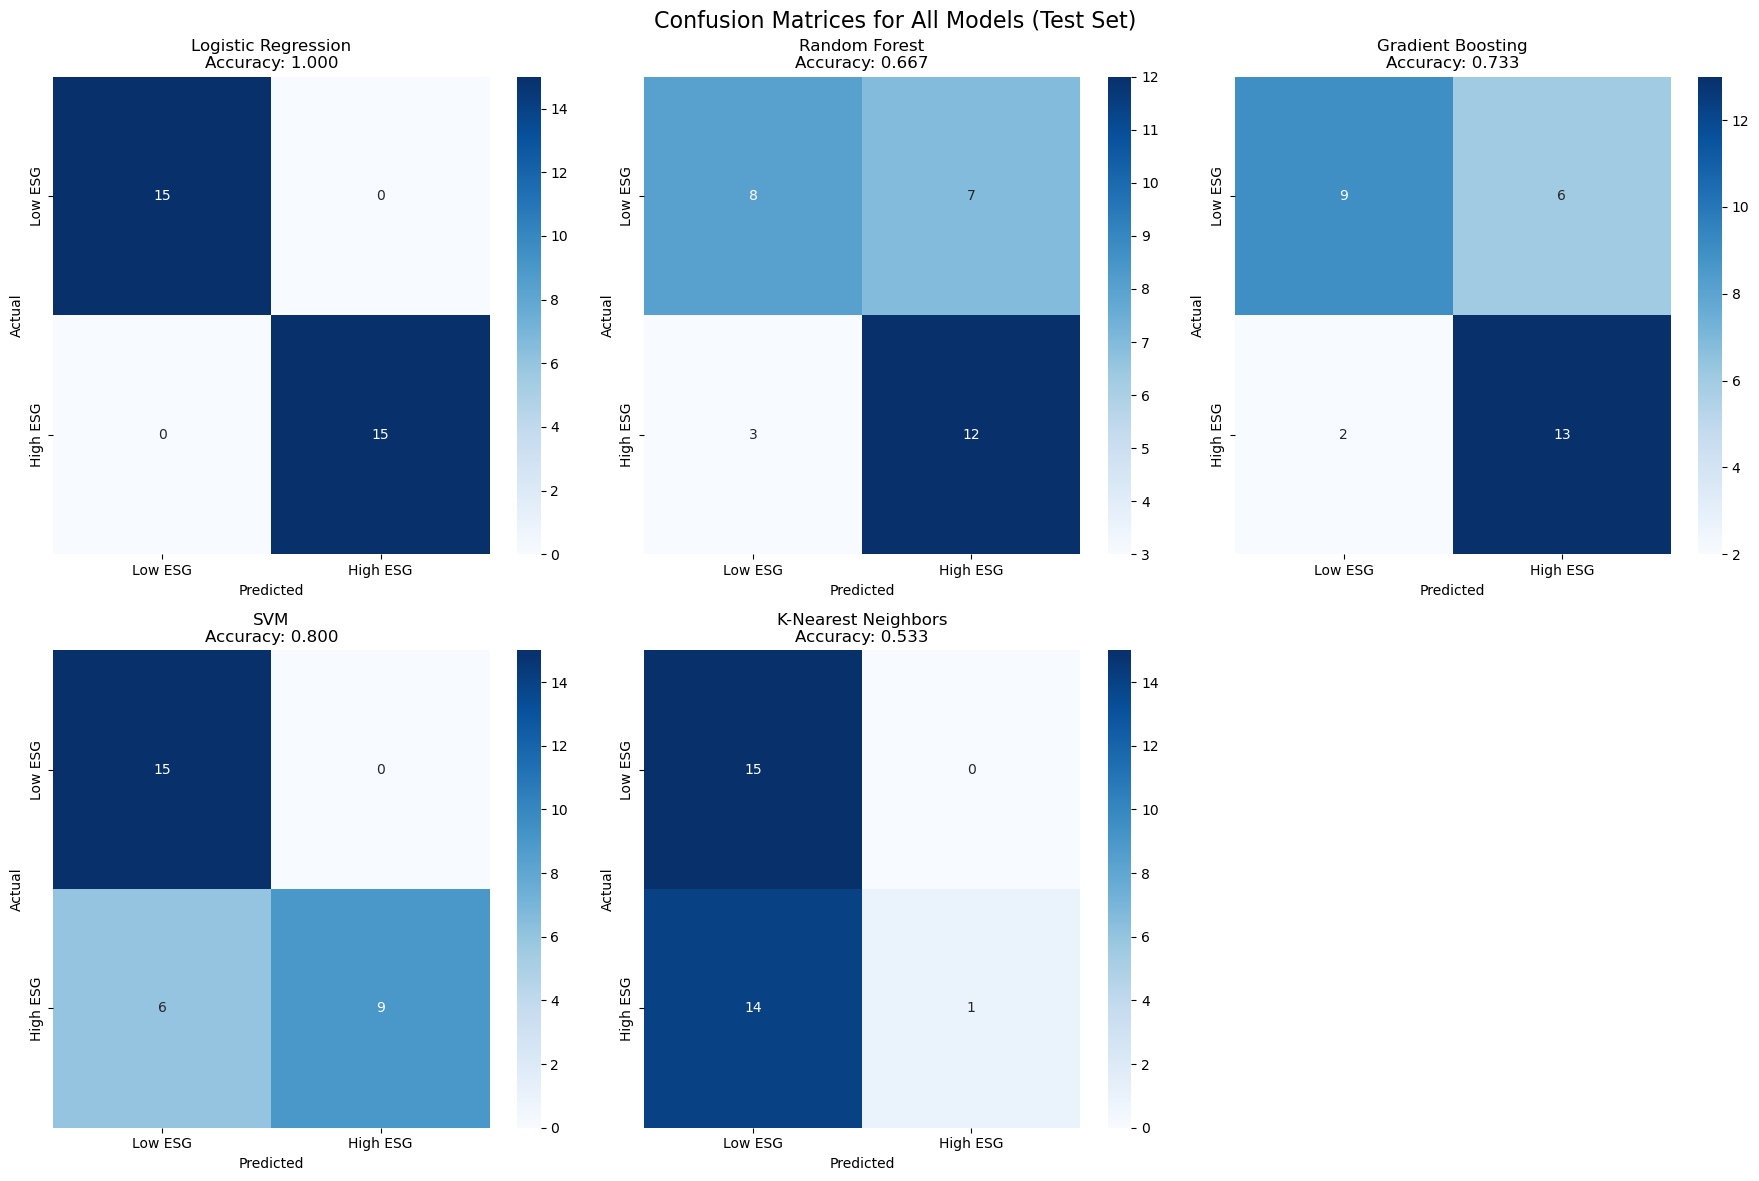

In [110]:
# 4. Confusion Matrices for All Models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, (name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Low ESG', 'High ESG'], 
                yticklabels=['Low ESG', 'High ESG'])
    axes[i].set_title(f'{name}\nAccuracy: {result["accuracy"]:.3f}')
    axes[i].set_ylabel('Actual')
    axes[i].set_xlabel('Predicted')

# Hide the last subplot if we have an odd number of models
if len(models) < 6:
    axes[5].set_visible(False)

plt.suptitle('Confusion Matrices for All Models (Test Set)', fontsize=16)
plt.tight_layout()
plt.show()

In [111]:
# Print detailed results for each model
print("="*80)
print("MACHINE LEARNING MODEL RESULTS (TEST SET PERFORMANCE)")
print("="*80)

for name, result in results.items():
    test_auc = roc_auc_score(y_test, result['y_proba'])
    print(f"\n{name}:")
    print(f"  Test AUC: {test_auc:.4f}")
    print(f"  CV AUC: {result['cv_auc_mean']:.4f} (±{result['cv_auc_std']:.4f})")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")
    print(f"  F1-Score: {result['f1']:.4f}")
    
    # Print classification report
    print("\n  Classification Report:")
    report = classification_report(y_test, result['y_pred'], target_names=['Low ESG', 'High ESG'])
    for line in report.split('\n'):
        print(f"  {line}")

# Identify best model based on test AUC
best_model_name = max(results.items(), key=lambda x: roc_auc_score(y_test, x[1]['y_proba']))[0]
best_auc = roc_auc_score(y_test, results[best_model_name]['y_proba'])
print(f"\nBest Model: {best_model_name} (Test AUC: {best_auc:.4f})")


MACHINE LEARNING MODEL RESULTS (TEST SET PERFORMANCE)

Logistic Regression:
  Test AUC: 1.0000
  CV AUC: 0.8531 (±0.0768)
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

  Classification Report:
                precision    recall  f1-score   support
  
       Low ESG       1.00      1.00      1.00        15
      High ESG       1.00      1.00      1.00        15
  
      accuracy                           1.00        30
     macro avg       1.00      1.00      1.00        30
  weighted avg       1.00      1.00      1.00        30
  

Random Forest:
  Test AUC: 0.7844
  CV AUC: 0.8306 (±0.1772)
  Accuracy: 0.6667
  Precision: 0.6316
  Recall: 0.8000
  F1-Score: 0.7059

  Classification Report:
                precision    recall  f1-score   support
  
       Low ESG       0.73      0.53      0.62        15
      High ESG       0.63      0.80      0.71        15
  
      accuracy                           0.67        30
     macro avg       0.68      0.67    

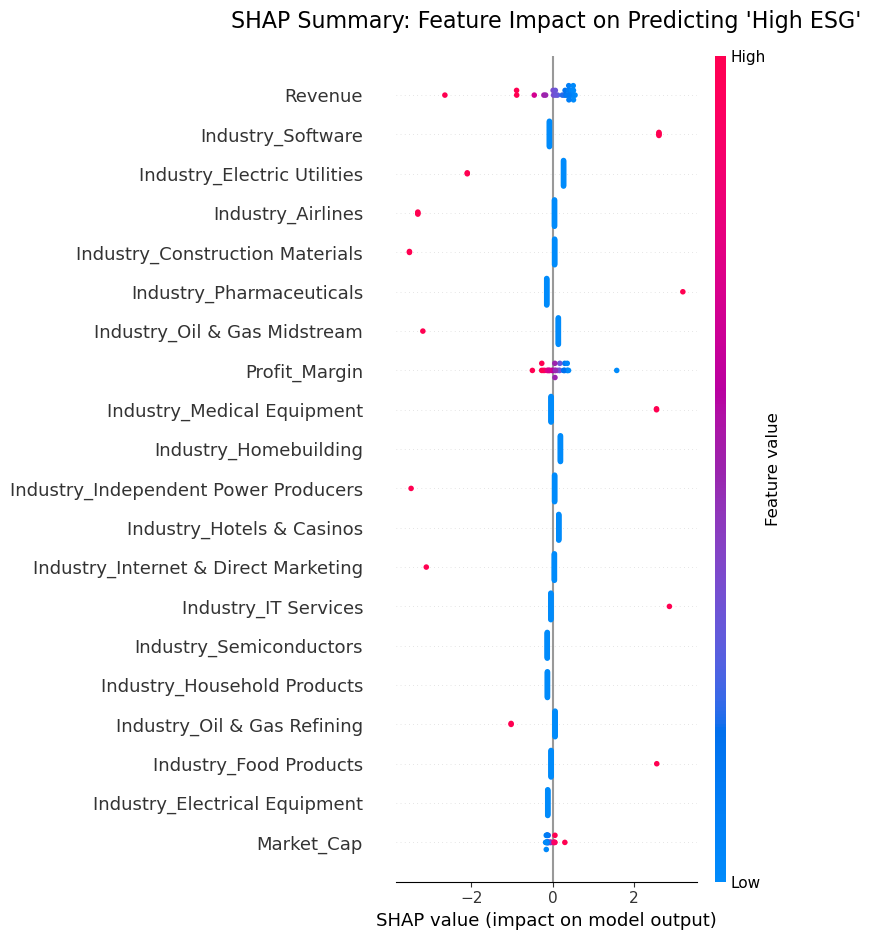

In [112]:
import shap

# Explain the model's predictions on the TEST set
explainer = shap.LinearExplainer(logistic_model, X_train_scaled, feature_names=X.columns)
shap_values = explainer(X_test_scaled) # Get SHAP values for the test set

# 1. Create the Beeswarm Plot
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type='dot', show=False)
plt.title("SHAP Summary: Feature Impact on Predicting 'High ESG'", fontsize=16, pad=20)
plt.tight_layout()
plt.show()



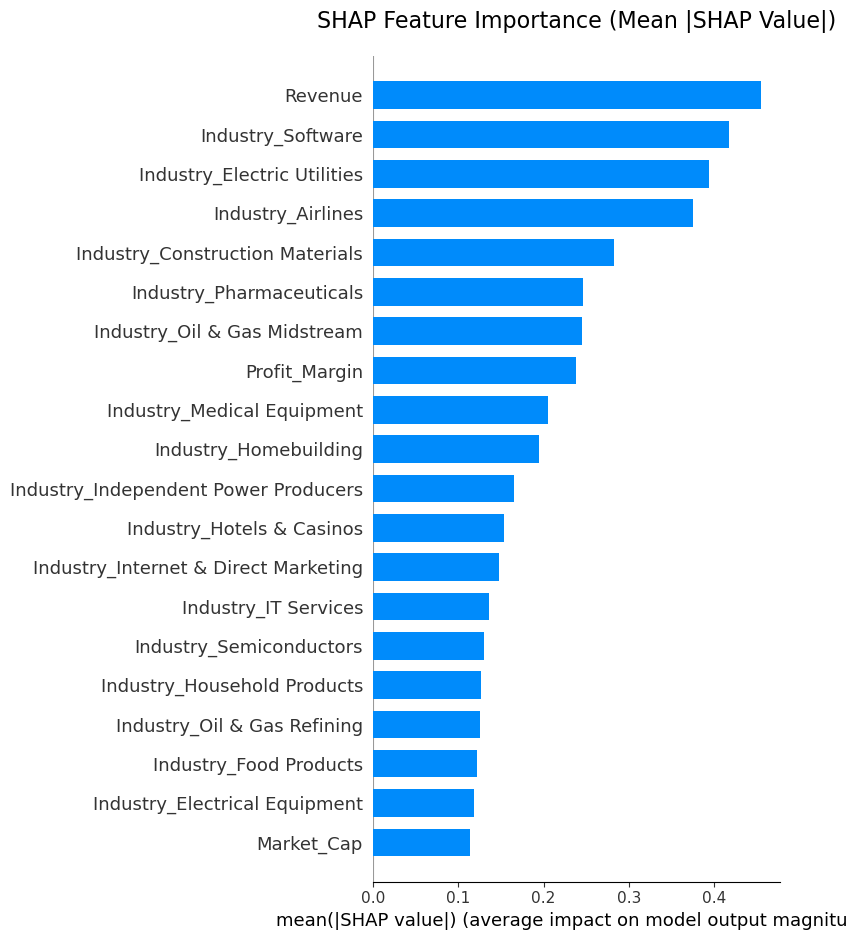

In [113]:
# 2.Bar Plot for a cleaner view of pure feature importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type='bar', show=False)
plt.title("SHAP Feature Importance (Mean |SHAP Value|)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()